In [1]:
# TODO: explain how to run this, and that they only need the gist (loads tools)

# wranglign ---------
import pandas as pd
from siuba import *

# plotting ----------
from plotnine import *

theme_set(theme_classic(base_family = "Noto Sans CJK JP"))

# data --------------
#fname = "/Users/machow/Dropbox/Repo/siublocks-org/intro-tidyverse/tutorial/data/music200.csv"
fname = "https://siublocks.s3.us-east-2.amazonaws.com/course-data/music200.csv"
music_top200 = pd.read_csv(fname)

# tracks
#fname = "/Users/machow/Dropbox/Repo/siublocks-org/intro-tidyverse/tutorial/data/track_features.csv"
fname = "https://siublocks.s3.us-east-2.amazonaws.com/course-data/track_features.csv"
track_features = pd.read_csv(fname)

# student support ----------
from siuba import pipe
from IPython.display import HTML, display
from siututor import Blank
___ = Blank()

# DataFrame display --------
pd.set_option("display.max_rows", 6)

from IPython import get_ipython
# special ipython function to get the html formatter
html_formatter = get_ipython().display_formatter.formatters['text/html']

# here, we avoid the default df._repr_html_ method, since it inlines css
# (style tags make vue angry)
html_formatter.for_type(
    pd.DataFrame,
    lambda df: df.to_html(max_rows = pd.get_option("display.max_rows"), show_dimensions = True)
)



### Putting it together

This lesson shows what the beginning of an analysis might look like.
Generally, data analysis is done in **notebooks**, like this one. In a notebook, you can alternate between blocks of code and narrative text.

The first part of an analysis is often **importing** tools you will need for the analysis.
For example, verbs like `filter` and `mutate` are imported from siuba.

Another coding concept you'll see in this example is a **comment**.
These are lines of code that start with `#`.
In this case, the line is not treated as code, but a note for the reader.

The imports for this analysis are shown below.

```python
# here we import verbs like filter, arrange, and mutate from siuba.
# the import * means to import all of siuba's verbs.
from siuba import *

# here we import everything for plotting from plotnine (like ggplot())
from plotnine import *

# here we import the data for the course
# note that rather than using * to get everything, you can name
# specific things to import (like track_features)
from music_top200 import music_top200, track_features
```

### Exercise 1:

For the artist with the top track in Spain, what country has the most streams for one of their tracks?

Note: you may need to code multiple times.

<details>
  <summary>hint</summary>
    
  > First, find the artist in the top position in Spain. After, can you get only that artists tracks? Once you do that you should be close!
    
</details>

In [2]:
# getting most streamed track for top artist in Spain
(


)

()

In [3]:
# Note: I would run the pipe with...
#   * only the commented out filter first, to get the artist (KAROL G)
#   * then, with the uncommented filter and arrange
(music_top200 
  # >> filter(_.country == "Spain")
  >> filter(_.artist == "KAROL G")
  >> arrange(-_.streams)
)

,country,position,track_name,artist,streams,duration,continent
8204,Mexico,5,Tusa,KAROL G,4830583,200.96,Americas
3600,Spain,1,Tusa,KAROL G,3295893,200.96,Europe
7897,United States,98,Tusa,KAROL G,2385525,200.96,Americas
...,...,...,...,...,...,...,...
3563,Estonia,164,Tusa,KAROL G,4681,200.96,Europe
7265,Malta,66,Tusa,KAROL G,3732,200.96,Europe
8095,Cyprus,96,Tusa,KAROL G,2168,200.96,Asia


### Exercise 2:

Subset to keep only tracks in Hong Kong, then calculate a new column called stream_seconds, that's equal to streams times their duration.

Once you've done that, try deleting the comments (`#`) in the code below to plot the data.

In [4]:
(music_top200
  >> ___
  >> ___
  #>> ggplot(aes("stream_seconds", "position", color = "duration"))
  # + geom_point()
)

⚠️: <b>Don't forget to replace all the blanks!</b>

findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


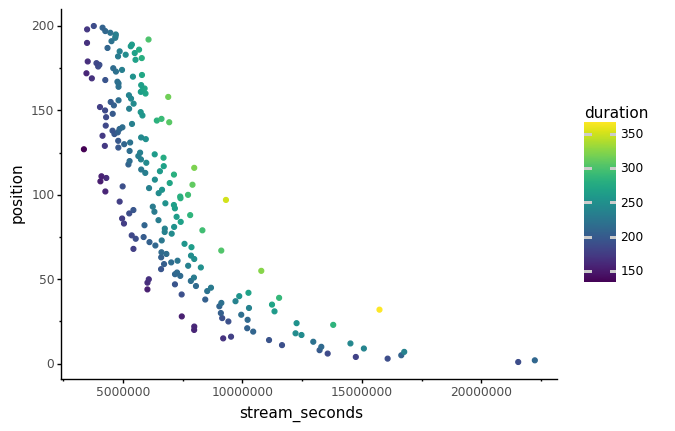

<ggplot: (295282664)>

In [5]:
(music_top200
  >> filter(_.country == "Hong Kong")
  >> mutate(stream_seconds = _.streams * _.duration)
  >> ggplot(aes("stream_seconds", "position", color = "duration"))
   + geom_point()
)